<a href="https://colab.research.google.com/github/zabihin/Bloc_3_Uber/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import spacy

In [3]:
# Load the data
df_train = pd.read_json(path_or_buf='/content/drive/MyDrive/Diagnosis/train.jsonl', lines=True)
df_test = pd.read_json(path_or_buf='/content/drive/MyDrive/Diagnosis/test.jsonl', lines=True)

In [4]:
df_train.head()

,output_text,input_text
0,cervical spondylosis,I've been having a lot of pain in my neck and ...
1,impetigo,I have a rash on my face that is getting worse...
2,urinary tract infection,I have been urinating blood. I sometimes feel ...
3,arthritis,I have been having trouble with my muscles and...
4,dengue,I have been feeling really sick. My body hurts...


In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   output_text  853 non-null    object
 1   input_text   853 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


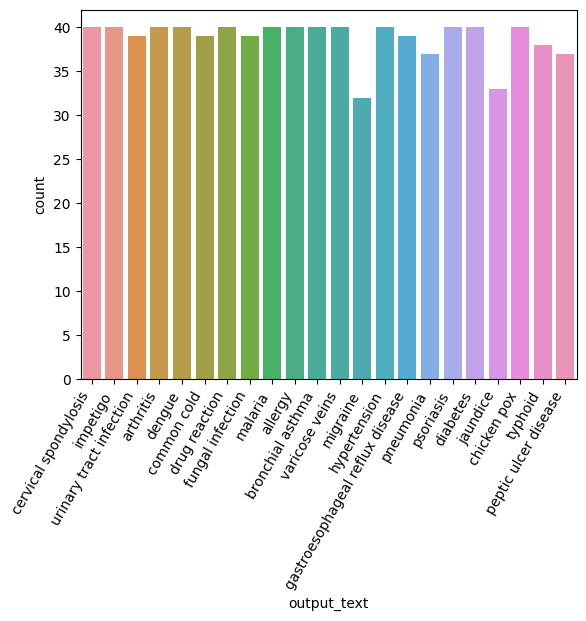

In [9]:
chart = sns.countplot(x = df_train.output_text)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right');

<Axes: ylabel='Count'>

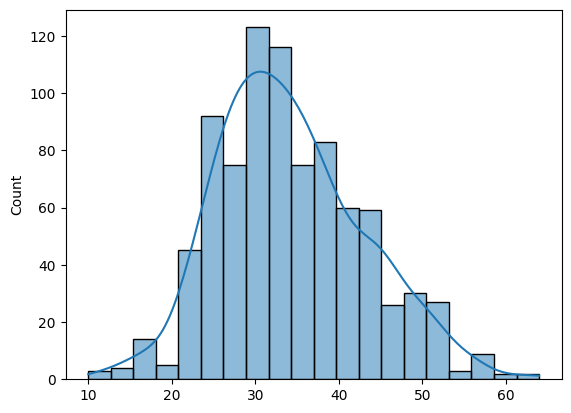

In [10]:
nlp = spacy.load('en_core_web_sm')

length = []

# Iterate over the values in the 'input_text' column of the DataFrame
for txt in df_train['input_text'].values:
    # Use spaCy to tokenize the text and calculate the number of tokens
    doc = nlp(txt)
    num_tokens = len(doc)

    # Append the number of tokens to the length list
    length.append(num_tokens)

# Create a histogram plot of the length distribution using seaborn
sns.histplot(length, kde=True, bins=20)

In [19]:
import spacy
from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')

# Load the English language model from spaCy
nlp = spacy.load('en_core_web_sm')

# Tokenize the text using spaCy
df_train['input_text'] = df_train['input_text'].apply(lambda x: [token.text.lower() for token in nlp(' '.join(x))])

# Flatten the list of tokenized words
all_words = [word for sublist in df_train['input_text'] for word in sublist]

# Get the set of stopwords
stopword_set = set(stopwords.words('english'))

# Count the frequency of each word, excluding stopwords
word_freq = Counter(word for word in all_words if word not in stopword_set)

# Get the 30 most common words
most_common_words = dict(word_freq.most_common(30))

# Create a DataFrame from the Counter
df_most_common = pd.DataFrame(list(most_common_words.items()), columns=['Word', 'Count'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


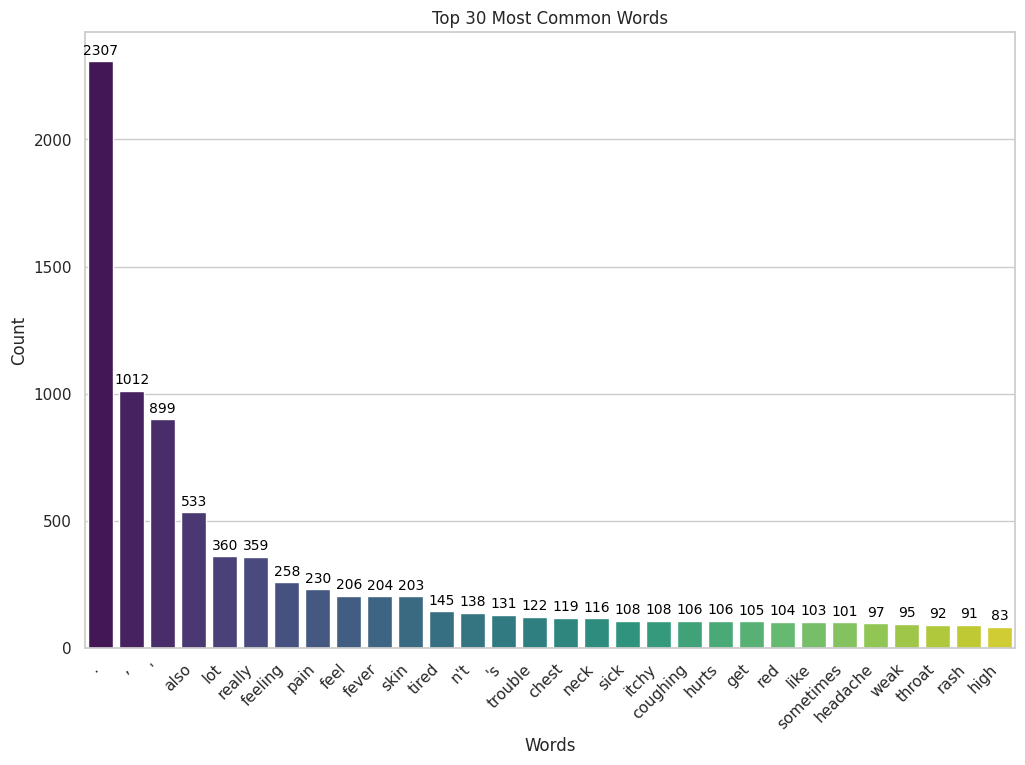

In [20]:
# Plot using sns.barplot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='Word', y='Count', data=df_most_common, order=df_most_common['Word'], palette="viridis")

# Display count on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Top 30 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()